In [1]:
import sys
import numpy as np
from ml_datasets.esl import Mixture
from ml_datasets.utils import plot_2D

In [2]:
mixture = Mixture()
x, y = mixture.load()

Retrieving ESL-Mixture dataset...
C:\Users\mzyskk\AppData\Local\Temp\ESL\ESL.mixture.rda available locally, skip downloading


In [3]:
print("x: {}, y: {}".format(x.shape, y.shape))

x: (200, 2), y: (200,)


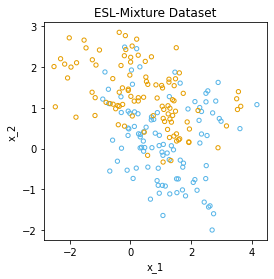

In [4]:
plt = plot_2D(x, y, "ESL-Mixture Dataset", axis='on')

Calculate euclidean distance between two data points:

In [5]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

In [6]:
def get_neighbor(i, x_row, x, num_neighbor=1):
    distance = np.zeros(x.shape[0])
    for j, x_ in enumerate(x):
        if i != j:
            distance[j] = euclidean_distance(x_row, x_)
        else:
            distance[j] = np.nan

    return np.argsort(distance)[:num_neighbor]


K-nearest neighbor fit for $y_hat$ is defined as follows:

$\hat y = \frac{1}{k}\sum_{x_i \in N_k(x)} y_i$

And the final classification output is given as:

$\hat G = \begin{cases}
    \color{orange}{\text{ORANGE}} \color{black}{\text{ or 1}}, & \text{if } \hat y > 0.5\\
    \color{blue}{\text{BLUE}} \color{black}{\text{ or 0}},              & \text{if } \hat y \leq 0.5
\end{cases}$

In [7]:
def classify(x_test, x_train, y, num_neighbor=1, threshold=0.5):
    y_hat = np.zeros(x_test.shape[0]).astype(float)
    G_hat = np.zeros_like(y_hat).astype(int)
    for i, x_row in enumerate(x_test):
        index_neighbor = get_neighbor(i, x_row, x_train, num_neighbor=num_neighbor)

        y_hat[i] = (1.000 / num_neighbor) * np.sum(y[index_neighbor]).astype(float)

        if y_hat[i] > threshold:
            G_hat[i] = 1
        else:
            G_hat[i] = 0
    
    return G_hat

In [8]:
# prepare data points for creating decision boundary
step = 0.05
x_1_range = np.arange(min(x[:, 0]), max(x[:, 0]), step)
x_2_range = np.arange(min(x[:, 1]), max(x[:, 1]), step)
x_1, x_2 = np.meshgrid(x_1_range,  x_2_range)
x_12 = np.concatenate((x_1.ravel().reshape(-1, 1), x_2.ravel().reshape(-1, 1)), axis=1)

In [9]:
# this method is used to plot the classification results (ground truth vs prediction and decision boundary)
def plot_classification(x, y, G_hat, Z, num_neighbor):
    BLUE, ORANGE = "#57B5E8", "#E69E00"
    plt.figure(figsize=(12, 12))
    plt.scatter(x[:, 0][y==1], x[:, 1][y==1], s=100, marker="o", edgecolors=ORANGE, facecolors="none", label='ground truth - class 1')
    plt.scatter(x[:, 0][y==0], x[:, 1][y==0], s=100, marker="o", edgecolors=BLUE, facecolors="none", label='ground truth - class 0')
#     plt.scatter(x[:, 0][G_hat==1] + 0.03, x[:, 1][G_hat==1], s=100, marker="*", edgecolors=ORANGE, facecolors="none", label='prediction - class 1')
#     plt.scatter(x[:, 0][G_hat==0] + 0.03, x[:, 1][G_hat==0], s=100, marker="*", edgecolors=BLUE, facecolors="none", label='prediction - class 0')
    plt.contour(x_1, x_2, Z.reshape(x_1.shape), colors="black", levels=[0])
    plt.legend()
    plt.title("{}-Nearest-Neighbor Classification".format(num_neighbor))
    plt.show()

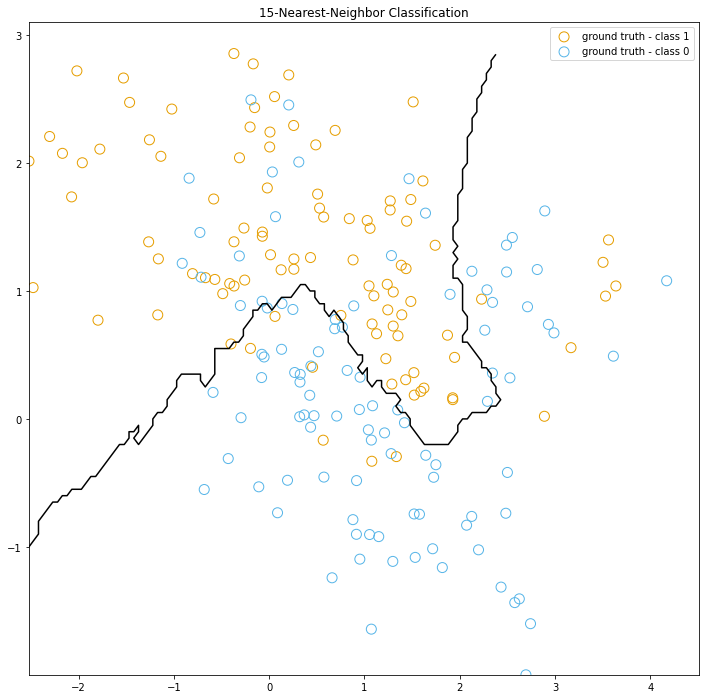

In [10]:
num_neighbor = 15
threshold = 0.5
G_hat = classify(x, x, y, num_neighbor=num_neighbor, threshold=threshold)
Z = classify(x_12, x, y, num_neighbor=num_neighbor, threshold=threshold)
plot_classification(x, y, G_hat, Z, num_neighbor)

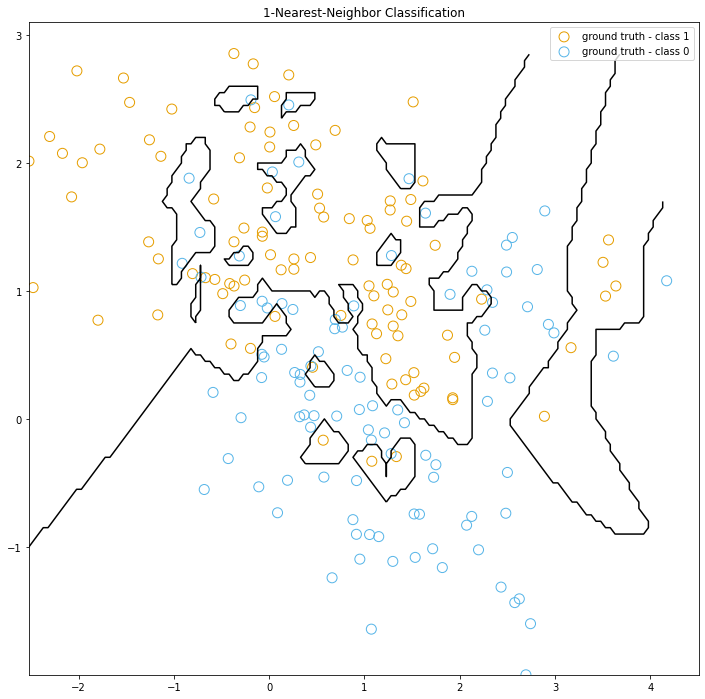

In [11]:
num_neighbor = 1
threshold = 0.5
G_hat = classify(x, x, y, num_neighbor=num_neighbor, threshold=threshold)
Z = classify(x_12, x, y, num_neighbor=num_neighbor, threshold=threshold)
plot_classification(x, y, G_hat, Z, num_neighbor)